###**CHAPII:MISSING VALUES**

In [ ]:
import random
import pandas as pd
import numpy as np

In [ ]:
# charger les données
data = pd.read_csv('/content/crx.data')#, header=None

# créer des noms de variables selon l'UCI Machine Learning
# informations Repo
varnames = ['A'+str(s) for s in range(1,17)]

# ajoutez les noms des colonnes
data.columns = varnames

# remplacer ? par np.nan
data = data.replace('?', np.nan)

# Remplacer certaines variables par les types corrects 
data['A2'] = data['A2'].astype('float')
data['A14'] = data['A14'].astype('float')

# Encodez la cible en binaire
data['A16'] = data['A16'].map({'+':1, '-':0})

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,1


In [ ]:
## ajouter plus de valeurs manquantes aux positions aléatoires
## cela aidera pour les démos des recettes

random.seed(9001)

values = set([random.randint(0, len(data)) for p in range(0, 100)])

for var in ['A3', 'A8', 'A9', 'A10'] :
    data.loc[values, var] = np.nan
    
    
data.isnull().sum()

A1     12
A2     12
A3     92
A4      6
A5      6
A6      9
A7      9
A8     92
A9     92
A10    92
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [ ]:
# save the data
data.to_csv('creditApprovalUCI.csv', index=False)

In [ ]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
2,b,27.83,NaN,u,g,w,v,NaN,NaN,NaN,5,t,g,100.0,3,1
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,1


In [ ]:
# find categorical variables
cat_cols = [c for c in data.columns if data[c].dtypes=='O']
data[cat_cols].head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,a,u,g,q,h,t,t,f,g
1,a,u,g,q,h,t,f,f,g
2,b,u,g,w,v,NaN,NaN,t,g
3,b,u,g,w,v,t,f,f,s
4,b,u,g,m,v,t,f,t,g


In [ ]:
# find numerical variables

num_cols = [c for c in data.columns if data[c].dtypes!='O']
data[num_cols].head()

,A2,A3,A8,A11,A14,A15,A16
0,58.67,4.460,3.04,6,43.0,560,1
1,24.50,0.500,1.50,0,280.0,824,1
2,27.83,NaN,NaN,5,100.0,3,1
3,20.17,5.625,1.71,0,120.0,0,1
4,32.08,4.000,2.50,0,360.0,0,1


##**Suppression des observations dont les données sont manquantes**

In [ ]:
# let's inspect the percentage of missing values in each variable

data.isnull().mean().sort_values(ascending=True)

A11    0.000000
A12    0.000000
A13    0.000000
A15    0.000000
A16    0.000000
A4     0.008708
A5     0.008708
A6     0.013062
A7     0.013062
A1     0.017417
A2     0.017417
A14    0.018868
A3     0.133527
A8     0.133527
A9     0.133527
A10    0.133527
dtype: float64

In [ ]:
# create a complete case data set

data_cca = data.dropna()

In [ ]:
print('Number of total observations: {}'.format(len(data)))
print('Number of observations with complete cases: {}'.format(len(data_cca)))

Number of total observations: 689
Number of observations with complete cases: 564


In [ ]:
# on peut aussi indiquer pour quelles variables on souhaite avoir les cas complets
# cas complets

data_cca = data.dropna(subset=[
    'A1',
    'A2',
    'A6',
    'A7',
    'A14',
])

In [ ]:
print('Number of total observations: {}'.format(len(data)))
print('Number of observations with complete cases: {}'.format(len(data_cca)))

Number of total observations: 689
Number of observations with complete cases: 652


###**Recipe-02-Performing-mean-or-median-imputation**

In [ ]:
!pip install feature_engine
# to impute missing data with feature-engine
from feature_engine.selection import DropCorrelatedFeatures
# to impute missing data with feature-engine
from feature_engine.imputation import MeanMedianImputer
# to impute missing data with feature-engine
from feature_engine.imputation import CategoricalImputer

In [ ]:
import pandas as pd

# to split the data sets
from sklearn.model_selection import train_test_split

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer



In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((482, 15), (207, 15))

In [ ]:
# find the percentage of missing data per variable

X_train.isnull().mean()

A1     0.016598
A2     0.016598
A3     0.141079
A4     0.010373
A5     0.010373
A6     0.012448
A7     0.012448
A8     0.141079
A9     0.141079
A10    0.141079
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.022822
A15    0.000000
dtype: float64

####**Mean / median imputation with pandas**

In [ ]:
# replace NA in indicated numerical variables

for var in ['A2', 'A3', 'A8', 'A11', 'A15']:

    value = X_train[var].median()

    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)

In [ ]:
# check absence of missing values in imputed variables

X_train[['A2', 'A3', 'A8', 'A11', 'A15']].isnull().sum()

A2     0
A3     0
A8     0
A11    0
A15    0
dtype: int64

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['A2', 'A3', 'A8', 'A11', 'A15']], data['A16'], test_size=0.3,random_state=0)

In [ ]:
# create a median imputation object with SimpleImputer
imputer = SimpleImputer(strategy='median')

# let's fit the imputer to the train set
# the imputer will learn the median of all variables
imputer.fit(X_train)

# we can look at the learnt medians:
imputer.statistics_

array([28.71  ,  2.7925,  1.    ,  0.    ,  4.5   ])

In [ ]:
# and now we impute the train and test sets
# NOTE: the data is returned as a numpy array!!!

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# check that missing values were removed

pd.DataFrame(X_train).isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
#import matplotlib.pyplot as plt

#fig = plt.figure()
#ax = fig.add_subplot(221)
##X_train_num = X_train.to_numpy()
#X_train.plot(kind='kde', ax=ax)
#lines, labels = ax.get_legend_labels()
#ax.legend(lines, labels, loc='best')

###**Mean / Median imputation with Feature-engine**

In [ ]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [ ]:
# let's create a median imputer

median_imputer = MeanMedianImputer(imputation_method='median',
                                   variables=['A2', 'A3', 'A8', 'A11', 'A15'])

median_imputer.fit(X_train)

MeanMedianImputer(variables=['A2', 'A3', 'A8', 'A11', 'A15'])

In [ ]:
# let's inspect the dictionary with the mappings for each variable
median_imputer.imputer_dict_

{'A11': 0.0, 'A15': 4.5, 'A2': 28.71, 'A3': 2.7925, 'A8': 1.0}

In [ ]:
# transform the data
X_train = median_imputer.transform(X_train)
X_test = median_imputer.transform(X_test)

In [ ]:
# check that null values were replaced
X_train[['A2', 'A3', 'A8', 'A11', 'A15']].isnull().mean()

A2     0.0
A3     0.0
A8     0.0
A11    0.0
A15    0.0
dtype: float64

####**Mean / median imputation with Sklearn selecting features to impute**

In [ ]:
import pandas as pd

# to impute missing data with sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# to split the data sets
from sklearn.model_selection import train_test_split

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [ ]:
# first we need to make a list with the numerical vars
numeric_features_mean = ['A2', 'A3', 'A8', 'A11', 'A15']

# then we instantiate the imputer within a pipeline
numeric_mean_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

# then we put the features list and the imputer in the column transformer
preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', numeric_mean_imputer, numeric_features_mean)
    ], remainder='passthrough')

In [ ]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['A2', 'A3', 'A8', 'A11', 'A15'])])

In [ ]:
# and now we impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
# Note that Scikit-Learn transformers return NumPy arrays!!
X_train

array([[46.08, 3.0, 2.375, ..., 't', 'g', 396.0],
       [24.75, 13.665, 1.5, ..., 'f', 'g', 280.0],
       [35.42, 12.0, 14.0, ..., 'f', 'g', 0.0],
       ...,
       [22.92, 1.25, 0.25, ..., 't', 'g', 120.0],
       [25.0, 12.33, 3.5, ..., 'f', 'g', 400.0],
       [21.08, 10.085, 1.25, ..., 'f', 'g', 260.0]], dtype=object)

###**Imputation par catégorie fréquente**

+ **L'imputation par mode consiste à remplacer toutes les occurrences de valeurs manquantes (NA) au sein d'une variable par le mode, c'est-à-dire la valeur la plus fréquente ou la catégorie la plus fréquente**.

+ Dans cette recette, nous allons remplacer les valeurs manquantes par la médiane ou la moyenne à l'aide de **pandas, Scikit-learn et Feature-Engine, toutes des bibliothèques Python open source**.



In [ ]:
import pandas as pd

# to split the data sets
from sklearn.model_selection import train_test_split

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer

# to impute missing data with feature-engine
from feature_engine.imputation import CategoricalImputer

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
2,b,27.83,NaN,u,g,w,v,NaN,NaN,NaN,5,t,g,100.0,3,1
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,1


In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((482, 15), (207, 15))

In [ ]:
# find the percentage of missing data within those variables

X_train.isnull().mean()

A1     0.016598
A2     0.016598
A3     0.141079
A4     0.010373
A5     0.010373
A6     0.012448
A7     0.012448
A8     0.141079
A9     0.141079
A10    0.141079
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.022822
A15    0.000000
dtype: float64

###**Frequent category imputation with pandas**

In [ ]:
# replace NA in some categorical variables

for var in ['A4', 'A5', 'A6', 'A7']:

    value = X_train[var].mode()[0]

    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)

In [ ]:
# check absence of missing values

X_train = X_train[['A4', 'A5', 'A6', 'A7']].isnull().sum()
X_train

A4    0
A5    0
A6    0
A7    0
dtype: int64

###**Frequent category imputation with Scikit-learn**

In [ ]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data[['A4', 'A5', 'A6', 'A7']], data['A16'], test_size=0.3, random_state=0)

In [ ]:
# create a frequent category imputation object with SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# we fit the imputer to the train set
# the imputer will learn the mode of all variables
imputer.fit(X_train)

# we can look at the learnt modes:
imputer.statistics_

array(['u', 'g', 'c', 'v'], dtype=object)

In [ ]:
# and now we impute the train and test set
# NOTE: the data is returned as a numpy array!!!

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
pd.DataFrame(X_train).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

###**Frequent category imputation with Feature-engine**

In [ ]:
# let's separate into training and testing set
#X_train, X_test, y_train, y_test = train_test_split(
 #   data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)
 # let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data[['A4', 'A5', 'A6', 'A7']], data['A16'], test_size=0.3, random_state=0)

In [ ]:
# let's create a frequent imputation transformer

mode_imputer = CategoricalImputer(variables=['A4', 'A5', 'A6', 'A7'], imputation_method='frequent')

mode_imputer.fit(X_train)

CategoricalImputer(imputation_method='frequent',
                   variables=['A4', 'A5', 'A6', 'A7'])

In [ ]:
# dictionary with the mappings for each variable
mode_imputer.imputer_dict_

{'A4': 'u', 'A5': 'g', 'A6': 'c', 'A7': 'v'}

In [ ]:
# and now we impute the train and test set
# NOTE: the data is returned as a numpy array!!!
#import numpy as np
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
pd.DataFrame(X_train, columns =['A4', 'A5', 'A6', 'A7']).isnull().sum()

A4    0
A5    0
A6    0
A7    0
dtype: int64

####**Frequent category imputation with Sklearn selecting features to impute**

In [ ]:
import pandas as pd

# objects to impute missing data with sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# to split the data sets
from sklearn.model_selection import train_test_split

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')

# let's separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [ ]:
# first we make a lists with the features
# to be imputed

categoric_features = ['A4', 'A5', 'A6', 'A7']

# then we instantiate the imputer within a pipeline

categoric_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

# then we put the features list and the imputer together
# using the column transformer

preprocessor = ColumnTransformer(transformers=[
    ('frequent_imputer', categoric_imputer, categoric_features)
    ], remainder='passthrough')

In [ ]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('frequent_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['A4', 'A5', 'A6', 'A7'])])

In [ ]:
# and now we can impute the data

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
# be carefutl that Scikit-Learn transformers return NumPy arrays!!
X_train

array([['u', 'g', 'c', ..., 'g', 396.0, 4159],
       ['u', 'g', 'q', ..., 'g', 280.0, 1],
       ['u', 'g', 'q', ..., 'g', 0.0, 6590],
       ...,
       ['u', 'g', 'q', ..., 'g', 120.0, 809],
       ['u', 'g', 'cc', ..., 'g', 400.0, 458],
       ['y', 'p', 'e', ..., 'g', 260.0, 0]], dtype=object)

####**Remplacement des valeurs manquantes par un nombre arbitraire**

+ Dans cette recette, nous allons remplacer les valeurs manquantes par un nombre arbitraire en utilisant **pandas, Scikit-learn et Feature-Engine, toutes des bibliothèques Python open source**.

In [ ]:
import pandas as pd

# to split the data sets
from sklearn.model_selection import train_test_split

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer

# to impute missing data with feature-engine
from feature_engine.imputation import ArbitraryNumberImputer

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
2,b,27.83,NaN,u,g,w,v,NaN,NaN,NaN,5,t,g,100.0,3,1
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,1


In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((482, 15), (207, 15))

In [ ]:
# find the percentage of missing data per variable

X_train.isnull().mean()

A1     0.016598
A2     0.016598
A3     0.141079
A4     0.010373
A5     0.010373
A6     0.012448
A7     0.012448
A8     0.141079
A9     0.141079
A10    0.141079
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.022822
A15    0.000000
dtype: float64

####**Arbitrary imputation with pandas**

In [ ]:
# find the maximum value per variable
X_train[['A2','A3', 'A8', 'A11']].max()

A2     76.75
A3     28.00
A8     28.50
A11    67.00
dtype: float64

In [ ]:
# replace NA with 99 in indicated numerical variables

for var in ['A2','A3', 'A8', 'A11']:
    
    X_train[var].fillna(99, inplace=True)
    X_test[var].fillna(99, inplace=True)

In [ ]:
# check absence of missing values
X_train[['A2','A3', 'A8', 'A11']].isnull().sum()

A2     0
A3     0
A8     0
A11    0
dtype: int64

####**Arbitrary imputation with Scikit-learn**

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['A2', 'A3', 'A8', 'A11']],
    data['A16'],
    test_size=0.3,
    random_state=0)

In [ ]:
# create an instance of the simple imputer
imputer = SimpleImputer(strategy='constant', fill_value=99)

# we fit the imputer to the train set
imputer.fit(X_train)

# we can look at the constant values:
imputer.statistics_

array([99., 99., 99., 99.])

In [ ]:
# and now we impute the train and test set
# NOTE: the data is returned as a numpy array!!!

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# check that missing values were removed
pd.DataFrame(X_train).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

###**Arbitrary imputation imputation with feature engine**

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [ ]:
# let's create an arbitrary value imputer

imputer = ArbitraryNumberImputer(
    arbitrary_number=99, variables=['A2','A3', 'A8', 'A11'])

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=99, variables=['A2', 'A3', 'A8', 'A11'])

In [ ]:
# dictionary with the mappings for each variable
imputer.arbitrary_number

99

In [ ]:
# transform the data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# check that null values were replaced
X_train[['A2','A3', 'A8', 'A11']].isnull().mean()

A2     0.0
A3     0.0
A8     0.0
A11    0.0
dtype: float64

####**Arbitrary imputation imputation with Sklearn selecting features to impute**

In [ ]:
import pandas as pd

# to impute missing data with sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# to split the data sets
from sklearn.model_selection import train_test_split

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1),data['A16' ], test_size=0.3, random_state=0)

In [ ]:
# first we need to make a list with the numerical vars
features_arbitrary = ['A2', 'A3', 'A8', 'A11']
features_mean = ['A15']

# then we instantiate the imputer within a pipeline
arbitrary_imputer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=99))])

mean_imputer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])

# then we put the features list and the imputer in
# the column transformer
preprocessor = ColumnTransformer(transformers=[
    ('arbitrary_imputer', arbitrary_imputer, features_arbitrary),
    ('mean_imputer', mean_imputer, features_mean)
    ], remainder='passthrough')

In [ ]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('arbitrary_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=99,
                                                                strategy='constant'))]),
                                 ['A2', 'A3', 'A8', 'A11']),
                                ('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['A15'])])

In [ ]:
# Note that Scikit-Learn transformers return NumPy arrays!!
X_train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
595,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396.0,4159
303,a,24.75,13.665,u,g,q,h,1.500,f,f,0,f,g,280.0,1
204,a,35.42,12.000,u,g,q,h,14.000,t,t,8,f,g,0.0,6590
643,b,36.17,0.420,y,p,w,v,0.290,f,f,0,t,g,309.0,2
118,a,20.75,10.335,u,g,cc,h,0.335,t,t,1,t,g,80.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,a,30.25,5.500,u,g,k,v,5.500,f,f,0,t,s,100.0,0
192,b,22.67,1.585,y,p,w,v,3.085,t,t,6,f,g,80.0,0
629,a,22.92,1.250,u,g,q,v,0.250,f,f,0,t,g,120.0,809
559,a,25.00,12.330,u,g,cc,h,3.500,t,t,6,f,g,400.0,458


####**Ajout d'une catégorie sur mesure**

+ Dans cette recette, nous allons créer une **catégorie "Missing" pour remplacer les valeurs manquantes dans les variables catégorielles** en utilisant **pandas, Scikit-learn et Feature-Engine**, toutes des bibliothèques Python open source.

In [ ]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((482, 15), (207, 15))

In [ ]:
# find the percentage of missing data per variable

X_train.isnull().mean()

A1     0.016598
A2     0.016598
A3     0.141079
A4     0.010373
A5     0.010373
A6     0.012448
A7     0.012448
A8     0.141079
A9     0.141079
A10    0.141079
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.022822
A15    0.000000
dtype: float64

####**Ajout d'une catégorie sur mesure avec pandas**

In [ ]:
# replace NA in some categorical variables

for var in ['A4', 'A5', 'A6', 'A7']:

    X_train[var].fillna('Missing', inplace=True)
    X_test[var].fillna('Missing', inplace=True)

In [ ]:
# check absence of missing values
X_train[['A4', 'A5', 'A6', 'A7']].isnull().sum()

A4    0
A5    0
A6    0
A7    0
dtype: int64

###**Imputation arbitraire imputation avec moteur de caractéristiques**

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [ ]:
# let's create an arbitrary value imputer

imputer = ArbitraryNumberImputer(
    arbitrary_number=99, variables=['A2','A3', 'A8', 'A11'])

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=99, variables=['A2', 'A3', 'A8', 'A11'])

In [ ]:
# dictionary with the mappings for each variable
imputer.arbitrary_number

99

In [ ]:
# transform the data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# check that null values were replaced
X_train[['A2','A3', 'A8', 'A11']].isnull().mean()

A2     0.0
A3     0.0
A8     0.0
A11    0.0
dtype: float64

###**Imputation arbitraire imputation avec Sklearn sélectionnant les caractéristiques à imputer**

In [ ]:
import pandas as pd

# to impute missing data with sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# to split the data sets
from sklearn.model_selection import train_test_split

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1),data['A16' ], test_size=0.3, random_state=0)

In [ ]:
# first we need to make a list with the numerical vars
features_arbitrary = ['A2', 'A3', 'A8', 'A11']
features_mean = ['A15']

# then we instantiate the imputer within a pipeline
arbitrary_imputer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=99))])

mean_imputer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])

# then we put the features list and the imputer in
# the column transformer
preprocessor = ColumnTransformer(transformers=[
    ('arbitrary_imputer', arbitrary_imputer, features_arbitrary),
    ('mean_imputer', mean_imputer, features_mean)
    ], remainder='passthrough')

In [ ]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('arbitrary_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=99,
                                                                strategy='constant'))]),
                                 ['A2', 'A3', 'A8', 'A11']),
                                ('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['A15'])])

In [ ]:
# and now we impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
# Note that Scikit-Learn transformers return NumPy arrays!!
X_train

array([[46.08, 3.0, 2.375, ..., 't', 'g', 396.0],
       [24.75, 13.665, 1.5, ..., 'f', 'g', 280.0],
       [35.42, 12.0, 14.0, ..., 'f', 'g', 0.0],
       ...,
       [22.92, 1.25, 0.25, ..., 't', 'g', 120.0],
       [25.0, 12.33, 3.5, ..., 'f', 'g', 400.0],
       [21.08, 10.085, 1.25, ..., 'f', 'g', 260.0]], dtype=object)

###**Remplacement des valeurs manquantes par un nombre arbitraire**
+ Dans cette recette, nous allons remplacer les valeurs manquantes par un nombre arbitraire en utilisant pandas, Scikit-learn et Feature-Engine, toutes des bibliothèques Python open source.

In [ ]:
import pandas as pd

# to split the data sets
from sklearn.model_selection import train_test_split

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer

# to impute missing data with feature-engine
from feature_engine.imputation import ArbitraryNumberImputer


In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
2,b,27.83,NaN,u,g,w,v,NaN,NaN,NaN,5,t,g,100.0,3,1
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,1


In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((482, 15), (207, 15))

In [ ]:
# find the percentage of missing data per variable

X_train.isnull().mean()

A1     0.016598
A2     0.016598
A3     0.141079
A4     0.010373
A5     0.010373
A6     0.012448
A7     0.012448
A8     0.141079
A9     0.141079
A10    0.141079
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.022822
A15    0.000000
dtype: float64

###**Imputation arbitraire avec pandas**

In [ ]:
# find the maximum value per variable
X_train[['A2','A3', 'A8', 'A11']].max()

A2     76.75
A3     28.00
A8     28.50
A11    67.00
dtype: float64

In [ ]:
# replace NA with 99 in indicated numerical variables

for var in ['A2','A3', 'A8', 'A11']:
    
    X_train[var].fillna(99, inplace=True)
    X_test[var].fillna(99, inplace=True)

In [ ]:
# check absence of missing values
X_train[['A2','A3', 'A8', 'A11']].isnull().sum()

A2     0
A3     0
A8     0
A11    0
dtype: int64

###**Imputation arbitraire avec Scikit-learn**

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['A2', 'A3', 'A8', 'A11']],
    data['A16'],
    test_size=0.3,
    random_state=0)

In [ ]:
# create an instance of the simple imputer
imputer = SimpleImputer(strategy='constant', fill_value=99)

# we fit the imputer to the train set
imputer.fit(X_train)

# we can look at the constant values:
imputer.statistics_

array([99., 99., 99., 99.])

In [ ]:
# and now we impute the train and test set
# NOTE: the data is returned as a numpy array!!!

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# check that missing values were removed
pd.DataFrame(X_train).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

###**Imputation arbitraire imputation avec moteur de caractéristiques**

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [ ]:
# let's create an arbitrary value imputer

imputer = ArbitraryNumberImputer(
    arbitrary_number=99, variables=['A2','A3', 'A8', 'A11'])

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=99, variables=['A2', 'A3', 'A8', 'A11'])

In [ ]:
# dictionary with the mappings for each variable
imputer.arbitrary_number

99

In [ ]:
# transform the data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# check that null values were replaced
X_train[['A2','A3', 'A8', 'A11']].isnull().mean()

A2     0.0
A3     0.0
A8     0.0
A11    0.0
dtype: float64

###**Imputation arbitraire imputation avec Sklearn sélectionnant les caractéristiques à imputer**

In [ ]:
import pandas as pd

# to impute missing data with sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# to split the data sets
from sklearn.model_selection import train_test_split

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1),data['A16' ], test_size=0.3, random_state=0)

In [ ]:
# first we need to make a list with the numerical vars
features_arbitrary = ['A2', 'A3', 'A8', 'A11']
features_mean = ['A15']

# then we instantiate the imputer within a pipeline
arbitrary_imputer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=99))])

mean_imputer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])

# then we put the features list and the imputer in
# the column transformer
preprocessor = ColumnTransformer(transformers=[
    ('arbitrary_imputer', arbitrary_imputer, features_arbitrary),
    ('mean_imputer', mean_imputer, features_mean)
    ], remainder='passthrough')

In [ ]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('arbitrary_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=99,
                                                                strategy='constant'))]),
                                 ['A2', 'A3', 'A8', 'A11']),
                                ('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['A15'])])

In [ ]:
# and now we impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
# Note that Scikit-Learn transformers return NumPy arrays!!
X_train

array([[46.08, 3.0, 2.375, ..., 't', 'g', 396.0],
       [24.75, 13.665, 1.5, ..., 'f', 'g', 280.0],
       [35.42, 12.0, 14.0, ..., 'f', 'g', 0.0],
       ...,
       [22.92, 1.25, 0.25, ..., 't', 'g', 120.0],
       [25.0, 12.33, 3.5, ..., 'f', 'g', 400.0],
       [21.08, 10.085, 1.25, ..., 'f', 'g', 260.0]], dtype=object)

###**Ajout d'une catégorie sur mesure**

+ Dans cette recette, nous allons créer une catégorie **"Missing"** pour remplacer les valeurs manquantes dans les variables catégorielles en utilisant pandas, Scikit-learn et Feature-Engine, toutes des bibliothèques Python open source.

In [ ]:
import pandas as pd

# to split the datasets
from sklearn.model_selection import train_test_split

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer

# to impute missing data with feature-engine
from feature_engine.imputation import CategoricalImputer

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
2,b,27.83,NaN,u,g,w,v,NaN,NaN,NaN,5,t,g,100.0,3,1
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,1


In [ ]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((482, 15), (207, 15))

In [ ]:
# find the percentage of missing data per variable

X_train.isnull().mean()

A1     0.016598
A2     0.016598
A3     0.141079
A4     0.010373
A5     0.010373
A6     0.012448
A7     0.012448
A8     0.141079
A9     0.141079
A10    0.141079
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.022822
A15    0.000000
dtype: float64

###**Ajout d'une catégorie sur mesure avec pandas**

In [ ]:
# replace NA in some categorical variables

for var in ['A4', 'A5', 'A6', 'A7']:

    X_train[var].fillna('Missing', inplace=True)
    X_test[var].fillna('Missing', inplace=True)

In [ ]:
# check absence of missing values
X_train[['A4', 'A5', 'A6', 'A7']].isnull().sum()

A4    0
A5    0
A6    0
A7    0
dtype: int64

###**Ajouter une catégorie sur mesure avec Scikit-learn**

In [ ]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data[['A4', 'A5', 'A6', 'A7']], data['A16'], test_size=0.3, random_state=0)

In [ ]:
# create an instance of the simple imputer
imputer = SimpleImputer(strategy='constant', fill_value='Missing')

# we fit the imputer to the train set
imputer.fit(X_train)

# we can look at the new category:
imputer.statistics_

array(['Missing', 'Missing', 'Missing', 'Missing'], dtype=object)

In [ ]:
# and now we impute the train and test set
# NOTE: the data is returned as a numpy array!!!

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
pd.DataFrame(X_train).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

###**Ajout d'une catégorie sur mesure avec le moteur de fonctionnalités**

In [ ]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [ ]:
imputer = CategoricalImputer(variables=['A4', 'A5', 'A6', 'A7'])

imputer.fit(X_train)

CategoricalImputer(variables=['A4', 'A5', 'A6', 'A7'])

In [ ]:
# transform the data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
X_train[['A4', 'A5', 'A6', 'A7']].isnull().mean()

A4    0.0
A5    0.0
A6    0.0
A7    0.0
dtype: float64

###**Ajout d'une catégorie sur mesure avec Sklearn sélection des caractéristiques à imputer**

In [ ]:
import pandas as pd

# to impute missing data with sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# to split the datasets
from sklearn.model_selection import train_test_split

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [ ]:
# first we make a lists with the features to be imputed
features_arbitrary = ['A4', 'A5']
features_mode = ['A6', 'A7']

# then we instantiate the imputer within a pipeline
arbitrary_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing'))])

mode_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

# then we put the features list and the imputers in
# the column transformer
preprocessor = ColumnTransformer(transformers=[
    ('arbitrary_imputer', arbitrary_imputer, features_arbitrary),
    ('mean_imputer', mode_imputer, features_mode)
    ], remainder='passthrough')

In [ ]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('arbitrary_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant'))]),
                                 ['A4', 'A5']),
                                ('mean_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['A6', 'A7'])])

In [ ]:
# and now we can impute the data

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
# be carefutl that Scikit-Learn transformers return NumPy arrays!!
X_train

array([['u', 'g', 'c', ..., 'g', 396.0, 4159],
       ['u', 'g', 'q', ..., 'g', 280.0, 1],
       ['u', 'g', 'q', ..., 'g', 0.0, 6590],
       ...,
       ['u', 'g', 'q', ..., 'g', 120.0, 809],
       ['u', 'g', 'cc', ..., 'g', 400.0, 458],
       ['y', 'p', 'e', ..., 'g', 260.0, 0]], dtype=object)

###**Remplacement des valeurs manquantes par une valeur à la fin de la distribution**

+ Dans cette recette, nous allons remplacer les valeurs manquantes par une valeur à la fin de la distribution, estimée avec l'approximation gaussienne ou la règle de proximité de l'intervalle inter-quantique, en utilisant pandas et Feature-Engine.

In [ ]:
import pandas as pd

# to split the datasets
from sklearn.model_selection import train_test_split

# to impute missing data with feature-engine
from feature_engine.imputation import EndTailImputer

###**Fin de l'imputation de queue avec pandas**

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
2,b,27.83,NaN,u,g,w,v,NaN,NaN,NaN,5,t,g,100.0,3,1
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,1


In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((482, 15), (207, 15))

In [ ]:
# find the percentage of missing data per variable

X_train.isnull().mean()

A1     0.016598
A2     0.016598
A3     0.141079
A4     0.010373
A5     0.010373
A6     0.012448
A7     0.012448
A8     0.141079
A9     0.141079
A10    0.141079
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.022822
A15    0.000000
dtype: float64

In [ ]:
# replace NA in indicated numerical variables
# using inter-quantal range proximity rule 

for var in ['A2', 'A3', 'A8', 'A11', 'A15']:

    IQR = X_train[var].quantile(0.75) - X_train[var].quantile(0.25)
    value = X_train[var].quantile(0.75) + 1.5 * IQR

    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)

In [ ]:
# check absence of missing values
X_train[['A2', 'A3', 'A8', 'A11', 'A15']].isnull().sum()

A2     0
A3     0
A8     0
A11    0
A15    0
dtype: int64

###**Imputation de fin de queue avec Feature Engine**

In [ ]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [ ]:
# let's create a median imputer
#dist = 'skewed'
#imputer = EndTailImputer(distribution=dist, tail='right', variables=['A2', 'A3', 'A8', 'A11', 'A15'])
imputer = EndTailImputer(imputation_method='gaussian',
                          tail='right',
                          variables=['A2', 'A3', 'A8', 'A11', 'A15'])
imputer.fit(X_train)

EndTailImputer(variables=['A2', 'A3', 'A8', 'A11', 'A15'])

In [ ]:
# dictionary with the mappings for each variable
imputer.imputer_dict_

{'A11': 17.828713911764417,
 'A15': 17797.137936301962,
 'A2': 67.55495652129812,
 'A3': 19.644793056165916,
 'A8': 12.580971028605749}

In [ ]:
# transform the data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
X_train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
595,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396.0,4159
303,a,24.75,13.665,u,g,q,h,1.500,f,f,0,f,g,280.0,1
204,a,35.42,12.000,u,g,q,h,14.000,t,t,8,f,g,0.0,6590
643,b,36.17,0.420,y,p,w,v,0.290,f,f,0,t,g,309.0,2
118,a,20.75,10.335,u,g,cc,h,0.335,t,t,1,t,g,80.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,a,30.25,5.500,u,g,k,v,5.500,f,f,0,t,s,100.0,0
192,b,22.67,1.585,y,p,w,v,3.085,t,t,6,f,g,80.0,0
629,a,22.92,1.250,u,g,q,v,0.250,f,f,0,t,g,120.0,809
559,a,25.00,12.330,u,g,cc,h,3.500,t,t,6,f,g,400.0,458


###**Imputation d'échantillons aléatoires**
+ Dans cette recette, nous allons effectuer une imputation d'échantillons aléatoires à l'aide de pandas et du Feature Engine.

In [ ]:

import pandas as pd

# to split the data sets
from sklearn.model_selection import train_test_split

# to impute missing data with feature-engine
from feature_engine.imputation import RandomSampleImputer

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
2,b,27.83,NaN,u,g,w,v,NaN,NaN,NaN,5,t,g,100.0,3,1
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,1


In [ ]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((482, 15), (207, 15))

In [ ]:
# find the percentage of missing data within those variables

X_train.isnull().mean()

A1     0.016598
A2     0.016598
A3     0.141079
A4     0.010373
A5     0.010373
A6     0.012448
A7     0.012448
A8     0.141079
A9     0.141079
A10    0.141079
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.022822
A15    0.000000
dtype: float64

###**Imputation d'échantillons aléatoires avec pandas**

In [ ]:
# extract a random sample (as many values as missing values in the variable)

number_missing_values = X_train['A2'].isnull().sum()
number_missing_values

8

In [ ]:
# extract a random sample (as many values as missing values in the variable)

random_sample_train = X_train['A2'].dropna().sample(number_missing_values, random_state=0)

In [ ]:
# re-index the random sample so that we can join it to our original data

random_sample_train.index = X_train[X_train['A2'].isnull()].index

random_sample_train.index

Int64Index([96, 514, 253, 607, 328, 444, 91, 82], dtype='int64')

In [ ]:
# replace the missing values
X_train.loc[X_train['A2'].isnull(), 'A2'] = random_sample_train

X_train['A2'].isnull().sum()

0

In [ ]:
# repeat in a loop for the rest of the variables
# and for both train and test set

for var in ['A1', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']:

    # extract a random sample
    random_sample_train = X_train[var].dropna().sample(
        X_train[var].isnull().sum(), random_state=0)

    random_sample_test = X_train[var].dropna().sample(
        X_test[var].isnull().sum(), random_state=0)

    # re index the random sample
    random_sample_train.index = X_train[X_train[var].isnull()].index
    random_sample_test.index = X_test[X_test[var].isnull()].index

    # replace the NA 
    X_train.loc[X_train[var].isnull(), var] = random_sample_train
    X_test.loc[X_test[var].isnull(), var] = random_sample_test
    
# check missing data
X_train[['A1', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']].isnull().sum()

A1    0
A3    0
A4    0
A5    0
A6    0
A7    0
A8    0
dtype: int64

###**Imputation par échantillon aléatoire avec Feature Engine**

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [ ]:
# let's create a random sample imputer

imputer = RandomSampleImputer()

imputer.fit(X_train)

RandomSampleImputer()

In [ ]:
# the imputer stores the train set

#imputer.X.head()

In [ ]:
# transform the data - replace the missing values

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# check that null values were replaced
X_train.isnull().mean()

A1     0.0
A2     0.0
A3     0.0
A4     0.0
A5     0.0
A6     0.0
A7     0.0
A8     0.0
A9     0.0
A10    0.0
A11    0.0
A12    0.0
A13    0.0
A14    0.0
A15    0.0
dtype: float64

###**Échantillonnage aléatoire semé sur des valeurs variables**

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [ ]:
imputer_obs = RandomSampleImputer(random_state=['A8', 'A3'], seed='observation', seeding_method='add')

In [ ]:
imputer_obs.fit(X_train)

RandomSampleImputer(random_state=['A8', 'A3'], seed='observation')

In [ ]:
X_train_tt = imputer_obs.transform(X_train)
X_test_tt = imputer_obs.transform(X_test)

###**Ajout d'une variable indicatrice de valeur manquante**

+ Dans cette recette, nous allons ajouter des variables binaires pour indiquer qu'une valeur est manquante en utilisant pandas, Scikit-learn et Feature-Engine, toutes des bibliothèques Python open source.

In [ ]:
import pandas as pd
import numpy as np

# to split the data sets
from sklearn.model_selection import train_test_split

# to impute missing data with feature-engine
from feature_engine.imputation import AddMissingIndicator

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
2,b,27.83,NaN,u,g,w,v,NaN,NaN,NaN,5,t,g,100.0,3,1
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,1


In [ ]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((482, 15), (207, 15))

In [ ]:
# find the percentage of missing data within those variables

X_train.isnull().mean()

A1     0.016598
A2     0.016598
A3     0.141079
A4     0.010373
A5     0.010373
A6     0.012448
A7     0.012448
A8     0.141079
A9     0.141079
A10    0.141079
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.022822
A15    0.000000
dtype: float64

###**Ajouter un indicateur manquant avec pandas**

In [ ]:
# add missing indicator

for var in ['A1', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']:

    X_train[var+'_NA'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_NA'] = np.where(X_test[var].isnull(), 1, 0)

    
# check the new missing indicator variables
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13,A14,A15,A1_NA,A3_NA,A4_NA,A5_NA,A6_NA,A7_NA,A8_NA
595,a,46.08,3.000,u,g,c,v,2.375,t,t,...,g,396.0,4159,0,0,0,0,0,0,0
303,a,24.75,13.665,u,g,q,h,1.500,f,f,...,g,280.0,1,0,0,0,0,0,0,0
204,a,35.42,12.000,u,g,q,h,14.000,t,t,...,g,0.0,6590,0,0,0,0,0,0,0
643,b,36.17,0.420,y,p,w,v,0.290,f,f,...,g,309.0,2,0,0,0,0,0,0,0
118,a,20.75,10.335,u,g,cc,h,0.335,t,t,...,g,80.0,50,0,0,0,0,0,0,0


In [ ]:
# the mean of the missing indicator should be the same as the 
# percentage of missing values in the original variable

X_train['A3'].isnull().mean(), X_train['A3_NA'].mean()

(0.14107883817427386, 0.14107883817427386)

###**Ajout d'un indicateur manquant avec le Feature Engine**

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [ ]:
# let's create a random sample imputer

imputer = AddMissingIndicator()

imputer.fit(X_train)

AddMissingIndicator()

In [ ]:
# transform the data - replace the missing values

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# check that null values were replaced
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A2_na,A3_na,A4_na,A5_na,A6_na,A7_na,A8_na,A9_na,A10_na,A14_na
595,a,46.08,3.000,u,g,c,v,2.375,t,t,...,0,0,0,0,0,0,0,0,0,0
303,a,24.75,13.665,u,g,q,h,1.500,f,f,...,0,0,0,0,0,0,0,0,0,0
204,a,35.42,12.000,u,g,q,h,14.000,t,t,...,0,0,0,0,0,0,0,0,0,0
643,b,36.17,0.420,y,p,w,v,0.290,f,f,...,0,0,0,0,0,0,0,0,0,0
118,a,20.75,10.335,u,g,cc,h,0.335,t,t,...,0,0,0,0,0,0,0,0,0,0


###**Ajout d'un indicateur manquant avec Scikit-learn**

In [ ]:
import pandas as pd
from sklearn.impute import MissingIndicator
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('creditApprovalUCI.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

In [ ]:
indicator = MissingIndicator(error_on_new=True, features='missing-only')
indicator.fit(X_train)  

MissingIndicator()

In [ ]:
# we can see the features with na:
# the result shows the column index in the NumPy array

indicator.features_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 13])

In [ ]:
# with Sklearn we need to join the missing indicators dataframe
# to the original X_train

# let's create a column name for each of the new MissingIndicators
indicator_cols = [c+'_NA' for c in X_train.columns[indicator.features_]]

# and now let's concatenate the original dataset with the missing indicators
X_train = pd.concat([
    X_train.reset_index(),
    pd.DataFrame(indicator.transform(X_train), columns = indicator_cols)],
    axis=1)

X_train.head()

,index,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A2_NA,A3_NA,A4_NA,A5_NA,A6_NA,A7_NA,A8_NA,A9_NA,A10_NA,A14_NA
0,595,a,46.08,3.000,u,g,c,v,2.375,t,...,False,False,False,False,False,False,False,False,False,False
1,303,a,24.75,13.665,u,g,q,h,1.500,f,...,False,False,False,False,False,False,False,False,False,False
2,204,a,35.42,12.000,u,g,q,h,14.000,t,...,False,False,False,False,False,False,False,False,False,False
3,643,b,36.17,0.420,y,p,w,v,0.290,f,...,False,False,False,False,False,False,False,False,False,False
4,118,a,20.75,10.335,u,g,cc,h,0.335,t,...,False,False,False,False,False,False,False,False,False,False


###**Réalisation d'une imputation multivariée avec MICE, KNN ou Random Forests**

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# load data with numerical variables

variables = ['A2','A3','A8', 'A11', 'A14', 'A15', 'A16']

data = pd.read_csv('creditApprovalUCI.csv', usecols=variables)

data.head()

,A2,A3,A8,A11,A14,A15,A16
0,58.67,4.460,3.04,6,43.0,560,1
1,24.50,0.500,1.50,0,280.0,824,1
2,27.83,NaN,NaN,5,100.0,3,1
3,20.17,5.625,1.71,0,120.0,0,1
4,32.08,4.000,2.50,0,360.0,0,1


In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((482, 6), (207, 6))

In [ ]:
# find the percentage of missing data within those variables

X_train.isnull().mean()

A2     0.016598
A3     0.141079
A8     0.141079
A11    0.000000
A14    0.022822
A15    0.000000
dtype: float64

In [ ]:
# let's create a MICE imputer using Bayes as estimator
imputer = IterativeImputer(estimator= BayesianRidge(),
                           max_iter=10, random_state=0)

In [ ]:
imputer.fit(X_train)

IterativeImputer(estimator=BayesianRidge(), random_state=0)

In [ ]:
# transform the data - replace the missing values

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
pd.DataFrame(X_train).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((482, 6), (207, 6))

In [ ]:
imputer_bayes = IterativeImputer(estimator=BayesianRidge(),
                                 max_iter=10,
                                 random_state=0)

imputer_knn = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5),
                                 max_iter=10,
                                 random_state=0)

imputer_nonLin = IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0),
                                 max_iter=10,
                                 random_state=0)

imputer_missForest = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                                 max_iter=10,
                                 random_state=0)

In [ ]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                 random_state=0)

In [ ]:
X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_nonLin = imputer_nonLin.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)

In [ ]:
predictors = [var for var in variables if var !='A16']

In [ ]:
X_train_bayes = pd.DataFrame(X_train_bayes, columns = predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)
X_train_nonLin = pd.DataFrame(X_train_nonLin, columns = predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns = predictors)

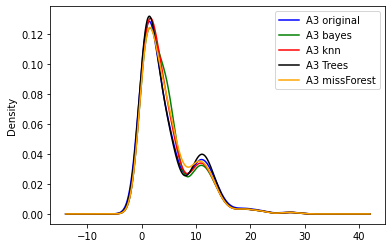

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['A3'].plot(kind='kde', ax=ax, color='blue')
X_train_bayes['A3'].plot(kind='kde', ax=ax, color='green')
X_train_knn['A3'].plot(kind='kde', ax=ax, color='red')
X_train_nonLin['A3'].plot(kind='kde', ax=ax, color='black')
X_train_missForest['A3'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['A3 original', 'A3 bayes', 'A3 knn', 'A3 Trees', 'A3 missForest']
ax.legend(lines, labels, loc='best')
plt.show()

###**Recipe-10-Assembling-an-imputation-pipeline-with-Scikit-learn**

  + Assemblage d'un pipeline d'imputation avec Scikit-learn

In [ ]:
import pandas as pd

# to impute missing data with sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# to split the data sets
from sklearn.model_selection import train_test_split

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
2,b,27.83,NaN,u,g,w,v,NaN,NaN,NaN,5,t,g,100.0,3,1
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,1


In [ ]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((482, 15), (207, 15))

In [ ]:
# find categorical variables
cat_cols = [c for c in data.columns if data[c].dtypes=='O']
data[cat_cols].isnull().mean().sort_values()

A12    0.000000
A13    0.000000
A4     0.008708
A5     0.008708
A6     0.013062
A7     0.013062
A1     0.017417
A9     0.133527
A10    0.133527
dtype: float64

In [ ]:
# find numerical variables
num_cols = [c for c in data.columns if data[c].dtypes!='O']
data[num_cols].isnull().mean().sort_values()

A11    0.000000
A15    0.000000
A16    0.000000
A2     0.017417
A14    0.018868
A3     0.133527
A8     0.133527
dtype: float64

In [ ]:
# find the percentage of missing data within those variables

X_train.isnull().mean()

A1     0.016598
A2     0.016598
A3     0.141079
A4     0.010373
A5     0.010373
A6     0.012448
A7     0.012448
A8     0.141079
A9     0.141079
A10    0.141079
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.022822
A15    0.000000
dtype: float64

In [ ]:
# we make a list with the numerical vars
features_num_arbitrary = ['A3', 'A8']
features_num_median = ['A2', 'A14']

# we make a list with the categorical vars
features_cat_frequent = ['A4', 'A5', 'A6', 'A7']
features_cat_missing = ['A1', 'A9', 'A10']

In [ ]:
# we instantiate each imputer within a pipeline

imputer_num_arbitrary = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=99)),
])

imputer_num_median = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

imputer_cat_frequent = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

imputer_cat_missing = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
])

In [ ]:
# then we put the features list and imputers in the column transformer

preprocessor = ColumnTransformer(transformers=[
    ('imp_num_arbitrary', imputer_num_arbitrary, features_num_arbitrary),
    ('imp_num_median', imputer_num_median, features_num_median),
    ('imp_cat_frequent', imputer_cat_frequent, features_cat_frequent),
    ('imp_cat_missing', imputer_cat_missing, features_cat_missing),
    ], remainder='passthrough')

In [ ]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp_num_arbitrary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=99,
                                                                strategy='constant'))]),
                                 ['A3', 'A8']),
                                ('imp_num_median',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['A2', 'A14']),
                                ('imp_cat_frequent',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['A4', 'A5', 'A6', 'A7']),
                                ('imp_cat_missing',
                                 Pipeline(steps=[('imputer

In [ ]:
# and now we impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
pd.DataFrame(X_train).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [ ]:
pd.DataFrame(X_test).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

###**Remplacer les valeurs manquantes par une valeur à la fin de la distribution**
+ Dans cette recette, nous allons remplacer les valeurs manquantes par une valeur à la fin de la distribution, estimée avec **l'approximation gaussienne ou la règle de proximité de l'intervalle inter-quantique**, en utilisant **pandas et Feature-Engine**, des bibliothèques Python open source.

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import feature_engine as mdi

In [ ]:
# load data
data = pd.read_csv('creditApprovalUCI.csv')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
2,b,27.83,NaN,u,g,w,v,NaN,NaN,NaN,5,t,g,100.0,3,1
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,1


In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((482, 15), (207, 15))

In [ ]:
# find categorical variables
cat_cols = [c for c in data.columns if data[c].dtypes=='O']
data[cat_cols].isnull().mean().sort_values()

A12    0.000000
A13    0.000000
A4     0.008708
A5     0.008708
A6     0.013062
A7     0.013062
A1     0.017417
A9     0.133527
A10    0.133527
dtype: float64

In [ ]:
# find numerical variables
num_cols = [c for c in data.columns if data[c].dtypes!='O']
data[num_cols].isnull().mean().sort_values()

A11    0.000000
A15    0.000000
A16    0.000000
A2     0.017417
A14    0.018868
A3     0.133527
A8     0.133527
dtype: float64

In [ ]:
# # find the percentage of missing data within those variables

# X_train.isnull().mean()

In [ ]:
# first we need to make a list with the numerical vars
features_num_arbitrary = ['A3', 'A8']
features_num_median = ['A2', 'A14']

features_cat_frequent = ['A4', 'A5', 'A6', 'A7']
features_cat_missing = ['A1', 'A9', 'A10']

In [ ]:
from feature_engine.imputation import ArbitraryNumberImputer

In [ ]:
# we instantiate each imputer within a pipeline

pipe = Pipeline(steps=[
    ('imp_num_arbitrary', mdi.ArbitraryNumberImputer(variables = features_num_arbitrary)),
    ('imp_num_median', mdi.MeanMedianImputer(imputation_method = 'median', variables=features_num_median)),
    ('imp_cat_frequent', mdi.FrequentCategoryImputer(variables = features_cat_frequent)),
    ('imp_cat_missing', mdi.CategoricalVariableImputer(variables=features_cat_missing))
])

AttributeError: ignored

In [ ]:
# now we fit the preprocessor
pipe.fit(X_train)

In [ ]:
# and now we impute the data
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
X_train.isnull().sum()

In [ ]:
X_test.isnull().sum()